In [1]:
%matplotlib inline
# %matplotlib enables matplotlib mode and means plt.show() is not required. TO update a plot us plt.draw()
# Alternative is %matplotlib inline which will lead to static images

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')

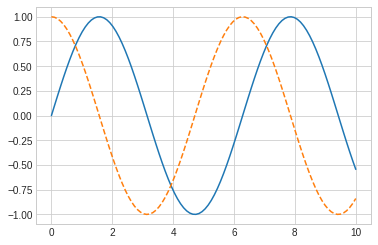

In [3]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

In [4]:
# Save figure
fig.savefig('my_figure.png')

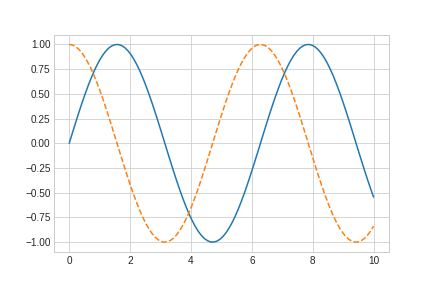

In [5]:
# View the saved figure
from IPython.display import Image
Image('my_figure.png')

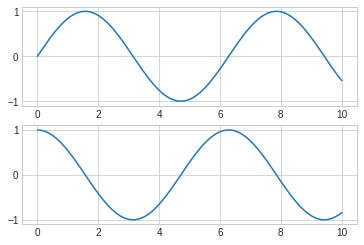

In [6]:
# MATLAB-style interface
plt.figure()

# create the first of two panels and set the current axis
plt.subplot(2, 1, 1) # rows, columns, panel number
plt.plot(x, np.sin(x))

# 2nd plot
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

# for this method you have to work chronologically on each plot whereas for the object orientated method it is not
# necessary

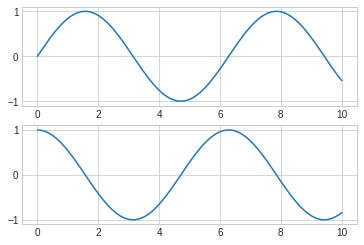

In [7]:
# Object orientated style interface
# First create a grid of plots, ax will be an array of two Axes objects.
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

(-0.5, 10.5, -1.0999864172539293, 1.0999855156811185)

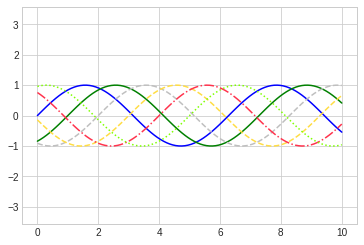

In [8]:
# Colours
plt.plot(x, np.sin(x-0), color='blue', linestyle='solid') # BY NAME
plt.plot(x, np.sin(x-1), color='g', linestyle='-') # SHORT COLOR CODE (rgbcmyk) (same linestyle as above)
plt.plot(x, np.sin(x-2), color='0.75', linestyle='dashed') # Grayscale between 0 and 1
plt.plot(x, np.sin(x-3), color='#FFDD44', linestyle='--') # Hex code 
plt.plot(x, np.sin(x-4), color=(1.0, 0.2, 0.3), linestyle='dashdot') # RGB tuple, values 0 and 1
plt.plot(x, np.sin(x-5), color='CHARTREUSE', linestyle=':') # all HTML color names supported

# set plot limits
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

# or in one go
plt.axis([-1, 11, -1.5, 1.5])

# fit tight
plt.axis('tight')

# or equal spacing
plt.axis('equal')

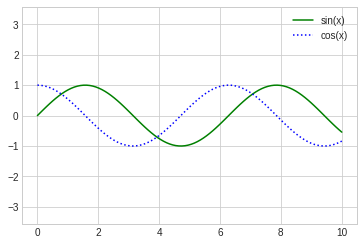

In [9]:
# legends
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend()

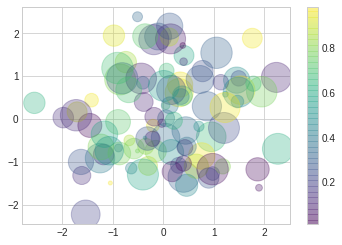

In [10]:
# scatter plots
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 *rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar()

<ErrorbarContainer object of 3 artists>

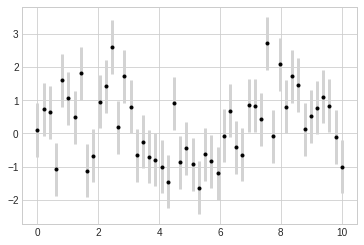

In [11]:
# Basic error bars
x=np.linspace(0, 10, 50)
dy=0.8
y=np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k', ecolor='lightgrey', elinewidth=3, capsize=0)

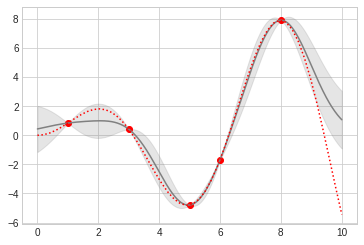

In [30]:
# Continuous errors

from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# compute gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit=np.linspace(0,10,1000)
yfit, se = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * se

plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.plot(x, x * np.sin(x), color='red', linestyle=':')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)

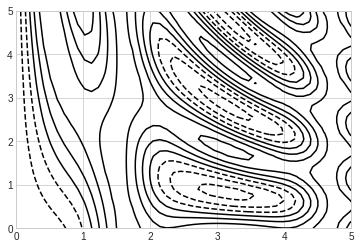

In [37]:
# Visualising a three-dimensional function
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x ) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)

Z = f(X, Y)

plt.contour(X, Y, Z, colors='black')

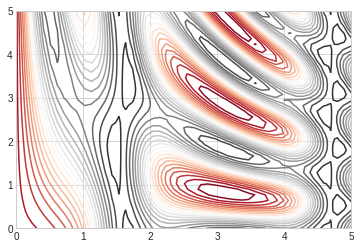

In [38]:
plt.contour(X, Y, Z, 20, cmap='RdGy')

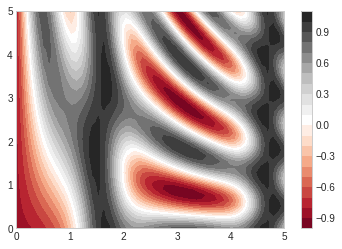

In [39]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

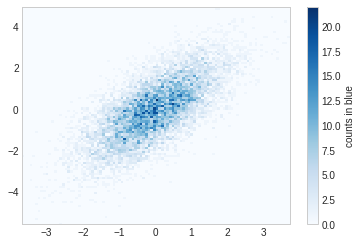

In [46]:
# Two dimensonal histogram
mean = [0, 0]
cov = [[1, 1], [1,2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=100, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in blue')

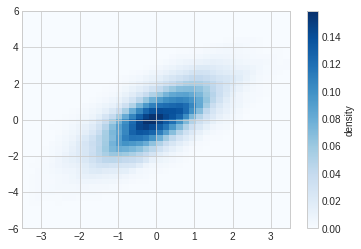

In [51]:
# Kernel density estimation
# KDR can be thought of a way to smear out the points in space and add up the restult to obtain a smooth function

from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# Evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the results as an image
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label('density')

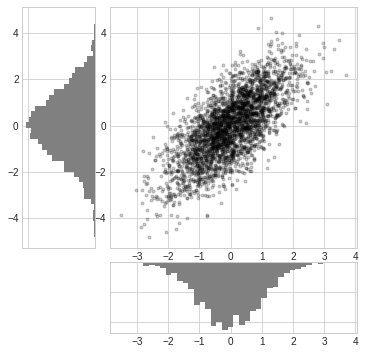

In [63]:
#  multiple subplots
mean = [0, 0]
cov = [[1,1], [1,2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# set up the axes with gridspec
fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4, 4,hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axis
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axis
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

In [64]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   178k      0  0:00:01  0:00:01 --:--:--  178k


/home/samodowd/anaconda3/envs/data-science-handbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/samodowd/anaconda3/envs/data-science-handbook/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  # This is added back by InteractiveShellApp.init_path()


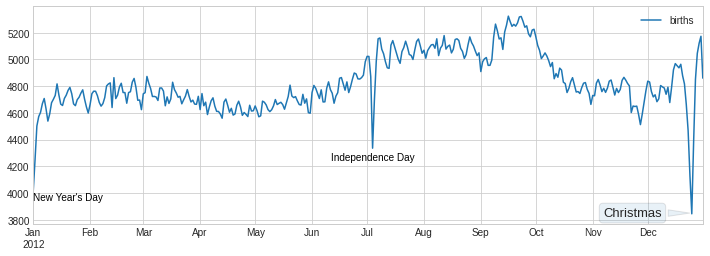

In [106]:
import pandas as pd


births_ = pd.read_csv('births.csv')
quartiles = np.percentile(births_['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
births = births_.query('(births > @mu - 5 *@sig) & (births < @mu + 5 *@sig)')

births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = "%Y%m%d")
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]


fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

#Add labels to the plot
style = dict(size=10, color='black')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", horizontalalignment='center', **style)

# add annotation with arrow
ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data', xytext=(-30,0), textcoords='offset points', 
            size=13, ha='right', va='center', bbox=dict(boxstyle="round", alpha=0.1),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))


# Three dimensional Plotting

In [1]:
from mpl_toolkits import mplot3d

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

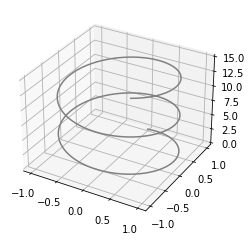

In [10]:
fig = plt.figure
ax = plt.axes(projection='3d')

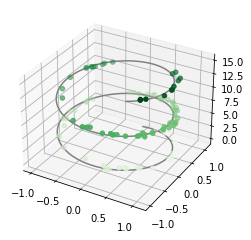

In [11]:
fig = plt.figure
ax = plt.axes(projection='3d')

# Data for 3d line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for 3D scatter plots
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.random(100)
ydata = np.cos(zdata) + 0.1 * np.random.random(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

In [12]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Text(0.5, 0, 'z')

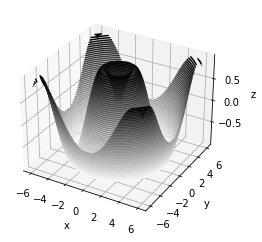

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


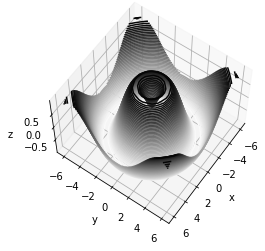

In [16]:
# Change angle view
ax.view_init(60, 35)
fig

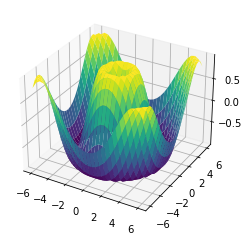

In [20]:
# Surface plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')